# Prepare interpolated freeboard dataset for ANN, LSTM

# Install the required libraries


In [16]:
# !pip install geopandas
# !pip install rasterio
# !pip install cartopy
# !pip install scipy
# !pip install matplotlib
# !pip install pandas
# !pip install rembg
# !pip uninstall tensorflow -y
# !pip install tensorflow
# !pip install scikit-learn

In [17]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import os
import glob


# LSTM Model

## Prepare the Data Set for LSTM

In [18]:
# accumulate data
path1 = os.path.abspath('../')
path_ATL03 = os.path.join(path1, "IS2_LSTM")
path_csv = os.path.join(path1, "csv")

path_before_training = os.path.join(path1, "Before_training")

# filelist = sorted(glob.glob(path_ATL03))
filelist = sorted(glob.glob(os.path.join(path_ATL03, "*.csv")))

print(filelist)
# Initialize an empty DataFrame
dataset_accu = []
# Loop through each file in the list and have index in the loop

for index, file in enumerate(filelist):
    print(index, file)
    start = time.time()
    # Read the CSV file
    dataset_ann = pd.read_csv(file, index_col=0)
    # Extract track number and add as a new column
    track_number = file[-12:-8]
    dataset_ann['track'] = track_number

    # Append to the accumulator DataFrame
    dataset_accu.append(dataset_ann)

    end = time.time() - start
    print(f"Time per file is {end}")
    print("------------ File done ------------")

# Save the accumulated DataFrame to a single CSV file

dataset_accu = pd.concat(dataset_accu, ignore_index=True)
output_file = os.path.join(path1, "data", "ATL03_accumulated.csv")
# dataset_accu.to_csv(output_file)
print("Saved at", output_file)

# Clean up
del dataset_accu
print("------------ Finish ------------")
print(f"Total files processed: {len(filelist)}")

['/Users/nathan/Documents/Files/Grad/UTSA/Courses/Thesis/mm-transformer-model/IS2_LSTM/ATL03_20191103184432_05780510_gt1r_ann.csv', '/Users/nathan/Documents/Files/Grad/UTSA/Courses/Thesis/mm-transformer-model/IS2_LSTM/ATL03_20191103184432_05780510_gt2r_ann.csv', '/Users/nathan/Documents/Files/Grad/UTSA/Courses/Thesis/mm-transformer-model/IS2_LSTM/ATL03_20191103184432_05780510_gt3r_ann.csv', '/Users/nathan/Documents/Files/Grad/UTSA/Courses/Thesis/mm-transformer-model/IS2_LSTM/ATL03_20191104195311_05940510_gt1r_ann.csv', '/Users/nathan/Documents/Files/Grad/UTSA/Courses/Thesis/mm-transformer-model/IS2_LSTM/ATL03_20191104195311_05940510_gt2r_ann.csv', '/Users/nathan/Documents/Files/Grad/UTSA/Courses/Thesis/mm-transformer-model/IS2_LSTM/ATL03_20191113191053_07310510_gt1r_ann.csv', '/Users/nathan/Documents/Files/Grad/UTSA/Courses/Thesis/mm-transformer-model/IS2_LSTM/ATL03_20191113191053_07310510_gt2r_ann.csv', '/Users/nathan/Documents/Files/Grad/UTSA/Courses/Thesis/mm-transformer-model/IS2_L

In [19]:
# separate features and labels
dataset_accu = pd.read_csv(output_file)
lstm_features = dataset_accu.copy()
lstm_labels = lstm_features.pop('label')
lstm_track = lstm_features.pop('track')
lstm_features

,Unnamed: 0,h_cor_mean-2,height_sd-2,pcnth_mean-2,pcnt_mean-2,h_cor_mean-1,height_sd-1,pcnth_mean-1,pcnt_mean-1,h_cor_mean0,...,pcnth_mean0,pcnt_mean0,h_cor_mean1,height_sd1,pcnth_mean1,pcnt_mean1,h_cor_mean2,height_sd2,pcnth_mean2,pcnt_mean2
0,0,0.637049,0.082355,3.000000,4.500000,0.679456,0.047031,1.666667,3.666667,0.723813,...,1.000000,4.000000,0.729230,0.000000,1.000000,2.000000,0.610320,0.067461,2.500000,3.500000
1,1,0.679456,0.047031,1.666667,3.666667,0.723813,0.000000,1.000000,4.000000,0.729230,...,1.000000,2.000000,0.610320,0.067461,2.500000,3.500000,0.726380,0.019368,1.666667,5.000000
2,2,0.723813,0.000000,1.000000,4.000000,0.729230,0.000000,1.000000,2.000000,0.610320,...,2.500000,3.500000,0.726380,0.019368,1.666667,5.000000,0.545018,0.103501,3.333333,5.000000
3,3,0.729230,0.000000,1.000000,2.000000,0.610320,0.067461,2.500000,3.500000,0.726380,...,1.666667,5.000000,0.545018,0.103501,3.333333,5.000000,0.611392,0.126779,3.000000,5.571429
4,4,0.610320,0.067461,2.500000,3.500000,0.726380,0.019368,1.666667,5.000000,0.545018,...,3.333333,5.000000,0.611392,0.126779,3.000000,5.571429,0.557143,0.127518,2.500000,4.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303680,1303680,1.248831,0.270227,5.133333,7.000000,1.410490,0.299490,4.636364,7.000000,1.521043,...,5.375000,6.000000,1.517701,0.244665,7.727273,10.636364,1.647001,0.246471,4.555556,7.000000
1303681,1303681,1.410490,0.299490,4.636364,7.000000,1.521043,0.192664,5.375000,6.000000,1.517701,...,7.727273,10.636364,1.647001,0.246471,4.555556,7.000000,1.533705,0.247331,9.000000,11.000000
1303682,1303682,1.521043,0.192664,5.375000,6.000000,1.517701,0.244665,7.727273,10.636364,1.647001,...,4.555556,7.000000,1.533705,0.247331,9.000000,11.000000,1.600905,0.195343,8.583333,11.416667
1303683,1303683,1.517701,0.244665,7.727273,10.636364,1.647001,0.246471,4.555556,7.000000,1.533705,...,9.000000,11.000000,1.600905,0.195343,8.583333,11.416667,1.428459,0.242420,7.000000,11.157895


In [20]:
# normalized the features
def norm(x, M = 1, m = 0):
    # Normalize the input data
    # output = (x-m)/(M-m) # Max-min normalization
    output = (x-x.mean())/(M-x.std()) # mean-std normalization
    return output

norm_lstm_features = norm(lstm_features)
norm_lstm_features

,Unnamed: 0,h_cor_mean-2,height_sd-2,pcnth_mean-2,pcnt_mean-2,h_cor_mean-1,height_sd-1,pcnth_mean-1,pcnt_mean-1,h_cor_mean0,...,pcnth_mean0,pcnt_mean0,h_cor_mean1,height_sd1,pcnth_mean1,pcnt_mean1,h_cor_mean2,height_sd2,pcnth_mean2,pcnt_mean2
0,1.732053,-0.671437,-0.102502,2.736370,1.408475,-0.589916,-0.141608,3.710948,1.550748,-0.504558,...,4.197687,1.493985,-0.494107,-0.193669,4.194785,1.834964,-0.722968,-0.119093,3.098521,1.579172
1,1.732051,-0.589732,-0.141462,3.704478,1.550465,-0.504472,-0.193515,4.195795,1.493947,-0.494123,...,4.197687,1.834788,-0.723166,-0.119151,3.104220,1.579351,-0.499366,-0.172216,3.703283,1.323594
2,1.732048,-0.504271,-0.193333,4.188531,1.493669,-0.494036,-0.193515,4.195795,1.834751,-0.723170,...,3.106335,1.579186,-0.499597,-0.172275,3.710090,1.323737,-0.848781,-0.079285,2.493759,1.323594
3,1.732045,-0.493833,-0.193333,4.188531,1.834444,-0.723094,-0.119060,3.104889,1.579148,-0.499613,...,3.712641,1.323583,-0.848960,-0.079342,2.498351,1.323737,-0.720903,-0.053572,2.735664,1.226232
4,1.732043,-0.722935,-0.118928,3.099410,1.578863,-0.499526,-0.172139,3.710948,1.323545,-0.848956,...,2.500029,1.323583,-0.721102,-0.053629,2.740699,1.226360,-0.825419,-0.052756,3.098521,1.451383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303680,-1.732043,0.507273,0.104706,1.187398,0.982505,0.818282,0.137024,1.551174,0.982741,1.031080,...,1.014578,1.153181,1.024745,0.076587,-0.696232,0.363250,1.274312,0.078637,1.606775,0.982825
1303681,-1.732045,0.818739,0.136981,1.548238,0.982505,1.031241,0.019122,1.013986,1.153143,1.024642,...,-0.696860,0.363137,1.273820,0.078582,1.609743,0.982919,1.056034,0.079586,-1.618622,0.301286
1303682,-1.732048,1.031739,0.019160,1.011928,1.152893,1.024803,0.076515,-0.696753,0.363097,1.273703,...,1.610779,0.982779,1.055574,0.079532,-1.621560,0.301283,1.185504,0.022162,-1.316241,0.230292
1303683,-1.732051,1.025300,0.076513,-0.696012,0.362913,1.273876,0.078508,1.609943,0.982741,1.055470,...,-1.622855,0.301172,1.185025,0.022106,-1.318625,0.230279,0.853267,0.074162,-0.167193,0.274383


In [21]:
# convert the data to LSTM format
np_array = norm_lstm_features.to_numpy()
print(np_array.shape)
new_lstm_features = []
for row in np_array:
  # construct features array
  point_r2 =  row[1:5]
  point_r1 =  row[5:9]
  point_0 = row[9:13]
  point_l1 = row[13:17]
  point_l2 = row[17:21]
  new_lstm_features.append([point_r2, point_r1, point_0, point_l1, point_l2])

new_lstm_features = np.array(new_lstm_features)
print(new_lstm_features.shape) # the X array inputshape = [5,4]
print(new_lstm_features) 

(1303685, 21)
(1303685, 5, 4)
[[[-0.67143746 -0.10250218  2.73636997  1.40847474]
  [-0.58991595 -0.14160828  3.71094754  1.55074785]
  [-0.50455837 -0.19369612  4.19768656  1.49398483]
  [-0.49410709 -0.19366929  4.19478492  1.83496411]
  [-0.72296826 -0.11909316  3.09852128  1.57917154]]

 [[-0.5897316  -0.14146168  3.70447761  1.55046465]
  [-0.50447172 -0.19351503  4.19579464  1.49394715]
  [-0.49412349 -0.19369612  4.19768656  1.83478843]
  [-0.72316623 -0.11915148  3.10422027  1.57935058]
  [-0.49936636 -0.17221565  3.70328322  1.32359438]]

 [[-0.50427082 -0.19333318  4.18853144  1.49366869]
  [-0.49403634 -0.19351503  4.19579464  1.83475135]
  [-0.7231696  -0.11917742  3.10633505  1.57918573]
  [-0.49959729 -0.17227509  3.71008952  1.32373704]
  [-0.84878057 -0.07928452  2.49375935  1.32359438]]

 ...

 [[ 1.03173906  0.01915984  1.01192822  1.1528929 ]
  [ 1.02480309  0.07651463 -0.69675334  0.36309686]
  [ 1.27370281  0.07855889  1.61077929  0.98277943]
  [ 1.05557405  0.0795

In [22]:
# covert labels to multi-class
def convert_to_multi_calss(data):
  new_labels = []
  for label in data:
    #print(row)
    if label == 0:
      new_labels.append([1,0,0]) 
    elif label == 1:
      new_labels.append([0,1,0])
    elif label == 2:
      new_labels.append([0,0,1])
    else:
      print("Error: invalid label:" + label)
      return 
  return np.array(new_labels)

lstm_labels_multi = convert_to_multi_calss(lstm_labels)
lstm_labels_multi

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

## Generating Training, Validation and Testing Data sets

In [23]:
# install sklearn
# !pip install scikit-learn

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(new_lstm_features, lstm_labels_multi, 
                                                    test_size =0.2, shuffle=True, random_state=20)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size =0.25, shuffle=True, random_state=20)

print("The train set size is {0:d}, validation set size is {1:d}, "
      "and testing set size is {2:d}".format(len(X_train), len(X_val), len(X_test)))

print("The shapes of training data are", X_train.shape, Y_train.shape)

print("The shapes of testing data are", X_test.shape, Y_test.shape)

print("The shapes of testing data are", X_val.shape, Y_val.shape)

The train set size is 782211, validation set size is 260737, and testing set size is 260737
The shapes of training data are (782211, 5, 4) (782211, 3)
The shapes of testing data are (260737, 5, 4) (260737, 3)
The shapes of testing data are (260737, 5, 4) (260737, 3)


## Evaluation Metric

In [25]:
import tensorflow.keras.backend as K

def recall_m(y_true, y_pred):
    y_true = K.cast(y_true, 'float32')
    y_pred = K.cast(y_pred, 'float32')
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    y_true = K.cast(y_true, 'float32')
    y_pred = K.cast(y_pred, 'float32')
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision+recall+K.epsilon()))

tf.keras.utils.get_custom_objects().update({
    'f1_m': f1_m,
    'precision_m': precision_m,
    'recall_m': recall_m
})

## Construct the LSTM model

Please adjust the following parameters
1. The number of units: from 8 to 256, with a step of 16
2. The activation function: tanh, sigmoid, relu, selu, elu, 
3. Dropout form 0 to 0.6, with a step of 0.1
4. Loss: "mse", "mape", keras.losses.SparseCategoricalCrossentropy(from_logits=True), tf.keras.losses.CategoricalCrossentropy(from_logits=True), tf.keras.losses.BinaryCrossentropy(from_logits=True)

For each configuration,
Please record: train accuracy, test accuracy, train time and test time

Please plot the result for each configuration.

Finally, please try all possible configurations to check if it is possible to drag it to 99% accurate. It is better to write a program to automate this process.

In [26]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout
#from keras.layers import CuDNNLSTM
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense
import tensorflow as tf

# Define model parameters
units = 32
sample_weight=np.array([0.10, 0.35, 0.65])
learning_rate = 0.005

#loss_func = tf.keras.losses.BinaryCrossentropy(from_logits=True)
loss_func = tf.keras.losses.CategoricalCrossentropy(from_logits=True)


model = Sequential()
model.add(LSTM(units, activation='elu', input_shape=(5, 4)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))


# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

focal_loss = tf.keras.losses.CategoricalFocalCrossentropy(
    alpha=sample_weight,
    gamma=2.0,
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction='sum_over_batch_size',
    name='categorical_focal_crossentropy'
)
# Compile the model
model.compile(optimizer=optimizer, loss=focal_loss, metrics=['accuracy', f1_m, precision_m, recall_m])
# Define early stopping and model checking
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# model = Sequential()
# model.add(CuDNNLSTM(units, batch_input_shape=(None, 5, 4)))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation='elu'))
# model.add(Dropout(0.2))
# model.add(Dense(3, activation='softmax'))
# model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Fit model lstm 240
# Train the model
import time
begin = time.time()
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_val, Y_val), verbose=1, callbacks=[early_stopping, model_checkpoint])


# Load the best model
model.load_weights('best_model.keras')

end = time.time()
print(f"The training time is {end - begin} seconds.")


Epoch 1/20
24445/24445 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.8679 - f1_m: 0.7028 - loss: 0.0543 - precision_m: 0.8995 - recall_m: 0.5962 - val_accuracy: 0.8828 - val_f1_m: 0.0000e+00 - val_loss: 0.0568 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/20
24445/24445 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.8826 - f1_m: 0.0935 - loss: 0.0568 - precision_m: 0.1194 - recall_m: 0.0908 - val_accuracy: 0.8828 - val_f1_m: 1.4874e-05 - val_loss: 0.0568 - val_precision_m: 2.4543e-04 - val_recall_m: 7.6697e-06
Epoch 3/20
24445/24445 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.8821 - f1_m: 0.0862 - loss: 0.0571 - precision_m: 0.1774 - recall_m: 0.0815 - val_accuracy: 0.8828 - val_f1_m: 0.0000e+00 - val_loss: 0.0569 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/20
24445/24445 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.8828 - f1_m: 0.0840 - loss: 0.0569 - precision_m: 0.1060 - recall_m: 0.0831 - val_accuracy: 0.8828 - val_f1_m: 0.0000e+00 

8149/8149 ━━━━━━━━━━━━━━━━━━━━ 5s 606us/step - accuracy: 0.8818 - f1_m: 0.0000e+00 - loss: 0.0568 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00
The testing time is 4.994592905044556 seconds.
Test Loss: 0.05672778561711311
Test Accuracy: 0.882011353969574
Test F1 Score: 0.0
Test Precision: 0.0
Test Recall: 0.0


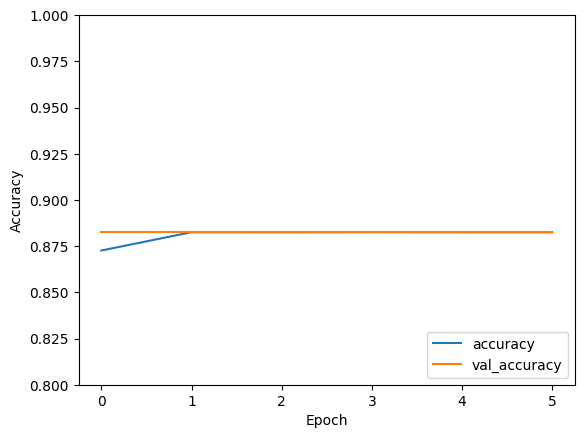

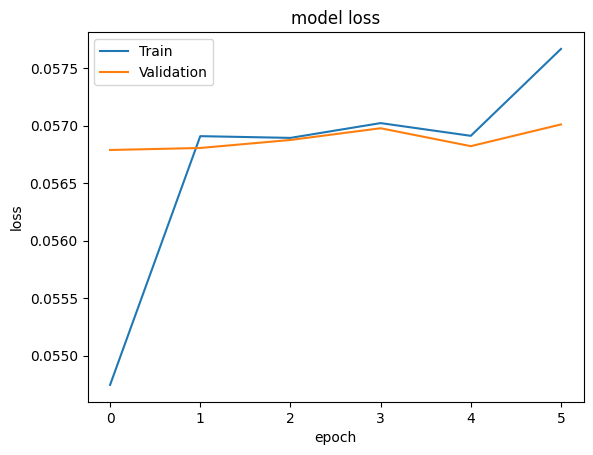

In [27]:
import matplotlib.pyplot as plt
# test the model
begin = time.time()
test_loss, test_acc, test_f1, test_precision, test_recall = model.evaluate(X_test,  Y_test, verbose=1)
end = time.time()
print(f"The testing time is {end - begin} seconds.")
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")
print(f"Test F1 Score: {test_f1}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")

# Check learning curve
# show the history of the model training
# the accuracy of the train and validation for each epoch
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [28]:
model.save('lstm_model.keras')
print("Model saved to lstm_model.keras")

Model saved to lstm_model.keras


: 